### Task 1

In [67]:
import math
import numpy as np
from matplotlib import pyplot
from numpy import mean, var, std
from scipy import stats
from collections import Counter, OrderedDict
import random
from pprint import pprint
import random
import scipy.special


def chi_square_test(observed, expected, alpha, dof):
    result = 0
    for i in range(len(observed)):
        result = float(result) + (expected[i] - observed[i]) ** 2 / float(expected[i])
    result *= len(observed)
    critical_value = stats.chi2.ppf(1 - alpha, dof)
    print(f'CHI-square test')
    print(f'result = {result}')
    print(f'critical value = {critical_value}')
    if result < critical_value:
        print(f'{result} < {critical_value}; pass')
    else:
        print(f'{result} > {critical_value}; fail')
    return result, result < critical_value


def get_interval_mu(gamma, mu, sigma, n):
    t = stats.t.ppf(gamma, n - 1)
    delta = t * sigma / np.sqrt(n)
    return mu - delta, mu + delta


def get_interval_sigma(gamma, sigma, n):
    alpha1 = (1 - gamma) / 2.0
    alpha2 = (1 + gamma) / 2.0

    right_border = np.sqrt((n - 1) / stats.chi2.ppf(alpha1, n - 1)) * sigma
    left_border = np.sqrt((n - 1) / stats.chi2.ppf(alpha2, n - 1)) * sigma

    return left_border, right_border

### Экспоненциальное распределение

Экспоненциальное распределение:
Математическое ожидание:  1.0008022525531708
Дисперсия:  1.0025973185749686
Среднеквадратичное отклонение: 1.0012978171228422

Доверительная вероятность == 0.99
Доверительный интервал Мат. ожидания:  0.9934 < mu <  1.0082
Доверительный интервал СКО:  0.9956 < sigma <  1.0071

CHI-square test
result = 9.7027749147036
critical value = 246.09465845289168
9.7027749147036 < 246.09465845289168; pass


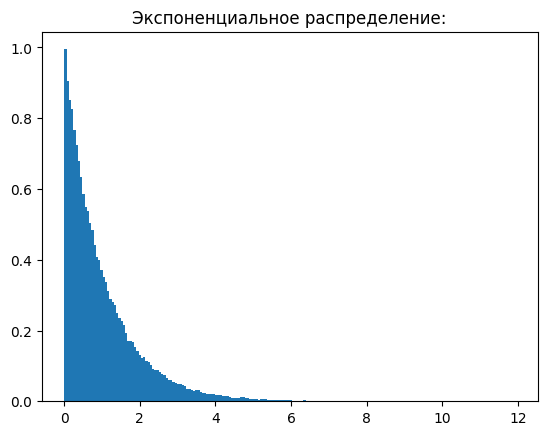

In [68]:
def exponential_numbers(L, size):
    numbers = [random.random() for _ in range(size)]
    array = []
    for num in numbers:
        if 1 - num > 0:
            array.append(((-1) / L) * (math.log(1 - num)))
    return array


def exponential_f(l, x):
    return l * np.exp(-l * x)


def get_exponential_expected(size, l, arguments):
    expected = []
    for i in range(size):
        expected.append(exponential_f(l, arguments[i]))

    return expected


def exponential_distribution():
    L = 1
    size = 10 ** 5
    exp = exponential_numbers(L, size)
    exp_m = mean(exp)
    exp_v = var(exp)
    exp_s = std(exp)
    probabilities, intervals, _ = pyplot.hist(exp, bins=200, density=True)
    intervals = intervals[1:]
    expected = get_exponential_expected(len(probabilities), L, intervals)
    pyplot.title("Экспоненциальное распределение:")
    print("Экспоненциальное распределение:")
    print("Математическое ожидание: ", exp_m)
    print("Дисперсия: ", exp_v)
    print(f"Среднеквадратичное отклонение: {exp_s}\n")
    gamma = 0.99
    print(f'Доверительная вероятность == {gamma}')
    mu_left_border, mu_right_border = get_interval_mu(gamma, exp_m, exp_s, size)
    print(f'Доверительный интервал Мат. ожидания: {mu_left_border : .4f} < mu < {mu_right_border : .4f}')
    sigma_left_border, sigma_right_border = get_interval_sigma(gamma, exp_s, size)
    print(f'Доверительный интервал СКО: {sigma_left_border : .4f} < sigma < {sigma_right_border : .4f}\n')
    chi_square_test(probabilities, expected, 0.01, len(intervals) - 3)

exponential_distribution()
pyplot.show()

### Task 2(16)

Хи-квадрат

Хи-квадрат дискретное распределение:
Математическое ожидание:  3.627565085629211
Дисперсия:  6.155160159805953
Среднеквадратичное отклонение: 2.4809595240160514

Доверительная вероятность == 0.99
Доверительный интервал Мат. ожидания:  3.6218 < mu <  3.6333
Доверительный интервал СКО:  2.4764 < sigma <  2.4855

CHI-square test
result = 15.361043104044088
critical value = 49.58788447289881
15.361043104044088 < 49.58788447289881; pass


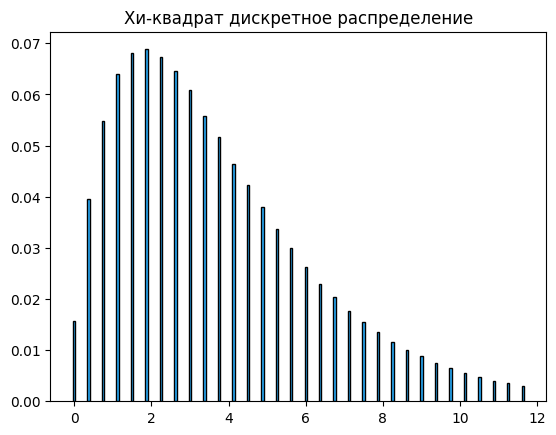

In [70]:
def get_chi_intervals(a, b, n, v):
    if v <= 0 or not isinstance(v, int):
        raise ValueError('v parameter must be positive integer')
    points = {}
    for i in range(n):
        x_i = a + i * (b - a) / n
        x_i2 = a + (i + 1) * (b - a) / n
        y = scipy.special.gammainc(v/2, x_i / 2)
        y_2 = scipy.special.gammainc(v/2, x_i2 / 2)
        points[x_i] = y_2 - y
    return points

def get_chi_values(a, b, n, v, intervals):
    x = [random.random()  for _ in range(n)]
    arguments = list(intervals.keys())
    arguments.sort()
    res = []
    for i in range(len(x)):
        generated_number =  x[i]
        s = 0 
        for j in range(len(arguments)):
            s += intervals[arguments[j]]
            if  generated_number < s:
                res.append(arguments[j])
                break
    return res

def chi_distribution():
    a, b, v_param = 0, 12, 4
    discrete_size, size = 32, 10**6
    intervals = get_chi_intervals(a, b, discrete_size, v_param)
    numbers = get_chi_values(a, b, size, v_param, intervals)
    m = mean(numbers)
    v = var(numbers)
    s = std(numbers)
    observed_values = OrderedDict({k: v / size for k, v in Counter(numbers).items()})
    pyplot.bar(
        observed_values.keys(),
        observed_values.values(),
        facecolor='#2ab0ff',
        edgecolor='#000000',
        width=2 / discrete_size
    )
    expected = list(intervals.values())
    pyplot.title("Хи-квадрат дискретное распределение")
    print("Хи-квадрат дискретное распределение:")
    print("Математическое ожидание: ", m)
    print("Дисперсия: ", v)
    print(f"Среднеквадратичное отклонение: {s}\n")
    gamma = 0.99
    print(f'Доверительная вероятность == {gamma}')
    mu_left_border, mu_right_border = get_interval_mu(gamma, m, s, size)
    print(f'Доверительный интервал Мат. ожидания: {mu_left_border : .4f} < mu < {mu_right_border : .4f}')
    sigma_left_border, sigma_right_border = get_interval_sigma(gamma, s, size)
    print(f'Доверительный интервал СКО: {sigma_left_border : .4f} < sigma < {sigma_right_border : .4f}\n')
    chi_square_test(list(observed_values.values()), expected, 0.01, len(observed_values) - 3)
    pyplot.show()

chi_distribution()